In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

In [7]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [8]:
pca = PCA(n_components=2)
df[['pca1', 'pca2']] = pca.fit_transform(df[[str(i) for i in range(1, 26)]])

In [11]:
X = df[[str(i) for i in range(1, 26)]]
for k in range(1, 20):
    clf = KMeans(n_clusters=k).fit(X)
    labels = clf.predict(X)
    df[f'k_{k}'] = labels
    

C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [51]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


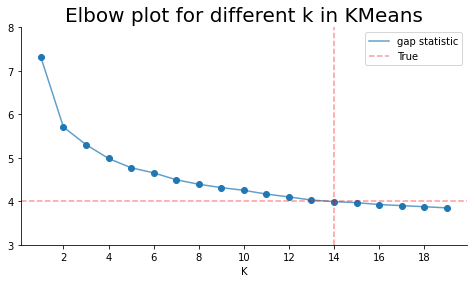

In [80]:
true_means = df.groupby('CurrentPartyCode').agg(
    {str(i): 'mean' for i in range(1, 26)}
).to_numpy()
true_gap = sum(np.min(cdist(X, true_means, 'euclidean'), axis=1)) / X.shape[0]

a = list(mapping1.keys())
b = list(mapping1.values())

fig, ax = plt.subplots(figsize=(8,4))

ax.set_ylim(3,8)
ax.set_title('Elbow plot for different k in KMeans', fontdict={'fontsize': 20})
ax.set_xlabel('K')
ax.set_xticks(range(0,20,2))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.plot(a,b, alpha=.7, label='gap statistic')
ax.scatter(a,b)
ax.axhline(true_gap, color='red', alpha=.4, label='True', linestyle='--')
ax.axvline(14, color='red', alpha=.4, linestyle='--')
ax.legend()